<a href="https://colab.research.google.com/github/insomaniac2k2/Skimlit/blob/main/09_skimlit_nlp_milestone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project: SkimLit

## Get the data
Replicating the PubMed 200k RCT paper.

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 12.80 MiB/s, done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [2]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [3]:
# Starting our experiments with 20k dataset with numbers replaced with '@' sign
data_dir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [4]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

## Preprocess the data

In [5]:
# Create function to read the lines of a document
def get_lines(filename):
  with open(filename, 'r') as f:
    return f.readlines()

In [6]:
train_lines = get_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [7]:
len(train_lines)

210040

How we want our data to look.

```[{'line_number': 0,
  'target': 'BACKGROUND',
  'text': 'Emotional eating is associated with overeating and the development of obesity .\n',
  'total_lines': 11}]```

In [8]:
def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] #create an empty list of abstracts

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line 
      abstract_lines = ""
    
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()
       
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split('\t')
        line_data['target'] = target_text_split[0]
        line_data['text'] = target_text_split[1].lower()
        line_data['line_number'] = abstract_line_number
        line_data['total_lines'] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)
    else:
      abstract_lines += line
  return abstract_samples

In [9]:
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + 'train.txt')
val_samples = preprocess_text_with_line_numbers(data_dir + 'dev.txt')
test_samples = preprocess_text_with_line_numbers(data_dir + 'test.txt')
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 647 ms, sys: 101 ms, total: 748 ms
Wall time: 1.13 s


(180040, 30212, 30135)

In [10]:
train_samples[:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [11]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


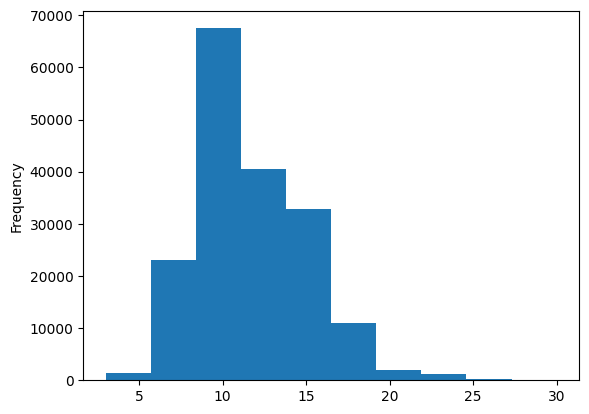

In [12]:
train_df.total_lines.plot.hist();

## Get lists of sentences

In [13]:
train_sentences = train_df['text'].tolist()
val_sentences = val_df['text'].tolist()
test_sentences = test_df['text'].tolist()

In [14]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Making numeric labels

In [15]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse_output=False)
train_labels_one_hot = one_hot.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot.transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot.transform(test_df['target'].to_numpy().reshape(-1,1))

train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [16]:
### Label encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels_encoded = label_encoder.transform(val_df['target'].to_numpy())
test_labels_encoded = label_encoder.transform(test_df['target'].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [17]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

num_classes, class_names 

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Starting series of modelling experiments

## Model 0: Getting a baseline

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(X=train_sentences,
            y=train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [19]:
model_0.score(val_sentences, val_labels_encoded)

0.7218323844829869

In [20]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

## Downloading the helper script

In [21]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-27 03:37:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-27 03:37:39 (79.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [22]:
from helper_functions import calculate_results

In [23]:
baseline_results = calculate_results(val_labels_encoded, baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [24]:
## Preparing our data for deep sequence models
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [25]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

In [26]:
import matplotlib.pyplot as plt

In [27]:
#plt.hist(sent_lens, bins=25);

In [28]:
# How long of a sentence length covers 95% of examples?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

## Create text vectorizer layer
we want to make a layer which maps our texts from words to numbers.

In [29]:
# How many words in our vocab?
max_tokens = 68000

In [30]:
text_vectorizer = layers.TextVectorization(max_tokens=max_tokens,
                                           output_sequence_length=output_seq_len)

In [31]:
text_vectorizer.adapt(train_sentences)

In [32]:
import random
target = random.choice(train_sentences)
print(f"Text:\n{target}")
print(f"Length of text: {len(target.split())}")
print(f"Vectorized text: {text_vectorizer([target])}")

Text:
women who received cbsm postsurgery for bca reported fewer depressive symptoms than those in the control group in this @-year follow-up .
Length of text: 22
Vectorized text: [[   90    67    80 14170  4870    11 21122   205   704   649   144    42
    125     5     2    35    13     5    23   157    94     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [33]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Most common words: {rct_20k_text_vocab[:5]}")
print(f"Least common words: {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
Most common words: ['', '[UNK]', 'the', 'and', 'of']
Least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [34]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

## Create custom text embedding

In [35]:
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab),
                               output_dim=128,
                               mask_zero=True,
                               name='token_embedding')

In [36]:
print(target)
text_vectorizer([target]), token_embed(text_vectorizer([target]))

women who received cbsm postsurgery for bca reported fewer depressive symptoms than those in the control group in this @-year follow-up .


(<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
 array([[   90,    67,    80, 14170,  4870,    11, 21122,   205,   704,
           649,   144,    42,   125,     5,     2,    35,    13,     5,
            23,   157,    94,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0]])>,
 <tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
 array([[[-0.00183251, -0.0047084 , -0.04361737, ..., -0.02171954,
           0.01156056,  0.03762442],
         [ 0.0142411 ,  0.00173863,  0.02612244, ...,  0.01532682,
           0.03286072,  0.02514248],
         [-0.0106342 ,  0.01038007,  0.03584934, ...,  0.00149968,
          -0.04162931, -0.01267884],
         ...,
         [ 0.0479044 ,  0.02466634, -0.03553776, ...,  0.04563344,
           0.03911665,  0.04622066],
         [ 0.04

## Creating datasets (tf.data API)

In [37]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [38]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [39]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 1: Conv1D with token embeddings

In [40]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [41]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [42]:
history_model_1 = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1*len(train_dataset)),
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1* len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 46s 62ms/step - loss: 0.9253 - accuracy: 0.6304 - val_loss: 0.6874 - val_accuracy: 0.7404
Epoch 2/3
562/562 [==============================] - 8s 14ms/step - loss: 0.6517 - accuracy: 0.7589 - val_loss: 0.6269 - val_accuracy: 0.7709
Epoch 3/3
562/562 [==============================] - 6s 11ms/step - loss: 0.6129 - accuracy: 0.7767 - val_loss: 0.5964 - val_accuracy: 0.7822


In [43]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5964 - accuracy: 0.7862


[0.5963732600212097, 0.7862438559532166]

In [44]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[4.2245859e-01, 1.5091199e-01, 6.8267696e-02, 3.3269572e-01,
        2.5665967e-02],
       [4.4985378e-01, 2.7185547e-01, 1.2577523e-02, 2.5470072e-01,
        1.1012532e-02],
       [1.6816418e-01, 5.6802863e-03, 8.0423313e-04, 8.2530648e-01,
        4.4840330e-05],
       ...,
       [4.8241031e-06, 5.3028081e-04, 5.8677647e-04, 4.3576324e-06,
        9.9887377e-01],
       [5.1516883e-02, 3.9955160e-01, 1.2659554e-01, 7.1107417e-02,
        3.5122851e-01],
       [1.8410026e-01, 7.1110314e-01, 4.0411618e-02, 3.3563782e-02,
        3.0821232e-02]], dtype=float32)

In [45]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [46]:
model_1_results = calculate_results(val_labels_encoded, model_1_preds)
model_1_results

{'accuracy': 78.62438766053224,
 'precision': 0.7834638188127824,
 'recall': 0.7862438766053224,
 'f1': 0.783881513767307}

In [47]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 2: Feature extraction with pretrained token embeddings

In [48]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False)

In [49]:
random_train_sentence = random.choice(train_sentences)
print(random_train_sentence)
tf_hub_embedding_layer([random_train_sentence])

bcs for this follow-up study were contacted at @ months postintervention and asked to complete assessments of motivational outcomes from the theory of planned behavior and pa behavior using the scottish physical activity questionnaire .


<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.05581994, -0.0241005 , -0.04870802, -0.0575988 ,  0.02649556,
         0.01125926,  0.04179944, -0.04488298, -0.03861728,  0.02416473,
        -0.03887852, -0.01172346,  0.07495987, -0.00603677,  0.02865265,
        -0.0237681 , -0.00923792,  0.00648549, -0.04323369, -0.04945493,
         0.04070251,  0.04721437, -0.00438475,  0.01399292, -0.03685597,
         0.05952146, -0.01515685, -0.01412003, -0.01574318,  0.01305505,
         0.04176911,  0.06791196, -0.04903409, -0.01522307, -0.05799403,
         0.01651837, -0.08464222, -0.07831826,  0.00021632,  0.00785662,
        -0.03904513,  0.07715977, -0.03870858, -0.07400595,  0.04960717,
         0.05881541,  0.04525989,  0.00296884,  0.06780192, -0.05352803,
         0.01117999,  0.06795058, -0.03353164,  0.00388844,  0.00278537,
         0.02537551, -0.00058652, -0.07417905, -0.01467087,  0.00733289,
        -0.02033233,  0.01665078, -0.04092456, -0.03490045, -0.00419227,
 

In [50]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation='relu')(pretrained_embedding)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [51]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [52]:
history_model_2 = model_2.fit(train_dataset,
                              steps_per_epoch=int(0.1*len(train_dataset)),
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1* len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 12s 14ms/step - loss: 0.9147 - accuracy: 0.6522 - val_loss: 0.7939 - val_accuracy: 0.6941
Epoch 2/3
562/562 [==============================] - 8s 15ms/step - loss: 0.7666 - accuracy: 0.7036 - val_loss: 0.7508 - val_accuracy: 0.7041
Epoch 3/3
562/562 [==============================] - 8s 15ms/step - loss: 0.7473 - accuracy: 0.7151 - val_loss: 0.7318 - val_accuracy: 0.7171


In [53]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 11s 12ms/step - loss: 0.7371 - accuracy: 0.7167


[0.7370954155921936, 0.7167019844055176]

In [54]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 10s 10ms/step


array([[0.4297326 , 0.3735148 , 0.00274487, 0.1864694 , 0.00753828],
       [0.38174012, 0.4437394 , 0.00539397, 0.1660962 , 0.00303027],
       [0.23761287, 0.13212933, 0.01783959, 0.5732762 , 0.03914196],
       ...,
       [0.00198811, 0.00630786, 0.04669311, 0.00111494, 0.94389594],
       [0.00401379, 0.05091661, 0.20040964, 0.00146204, 0.7431979 ],
       [0.1893965 , 0.27367637, 0.46197793, 0.0067438 , 0.06820539]],
      dtype=float32)

In [55]:
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [56]:
model_2_results = calculate_results(val_labels_encoded, model_2_preds)
model_2_results

{'accuracy': 71.67019727260691,
 'precision': 0.7176066900587453,
 'recall': 0.7167019727260691,
 'f1': 0.7135835423717595}

## Model 3: Conv1D with character embeddings

### Creating a character-level tokenizer

In [57]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [58]:
def split_chars(text):
  return " ".join(list(text))

split_chars(random_train_sentence)

'b c s   f o r   t h i s   f o l l o w - u p   s t u d y   w e r e   c o n t a c t e d   a t   @   m o n t h s   p o s t i n t e r v e n t i o n   a n d   a s k e d   t o   c o m p l e t e   a s s e s s m e n t s   o f   m o t i v a t i o n a l   o u t c o m e s   f r o m   t h e   t h e o r y   o f   p l a n n e d   b e h a v i o r   a n d   p a   b e h a v i o r   u s i n g   t h e   s c o t t i s h   p h y s i c a l   a c t i v i t y   q u e s t i o n n a i r e   .'

In [59]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [60]:
char_lens = [len(sentence) for sentence in train_sentences]
max_char_len = np.mean(char_lens)

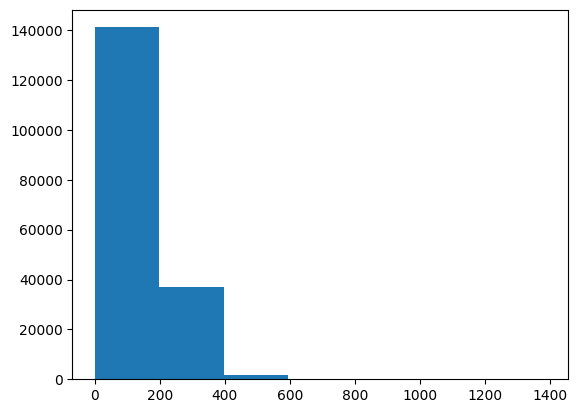

In [61]:
plt.hist(char_lens, bins=7);

In [62]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [63]:
# Get all keyboard characters
random.choice(train_sentences)

'the final analyses included @ patients ( median age @ years ; females @ % ) .'

In [64]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
NUM_CHAR_TOKENS = len(alphabet) + 2  # space and UNK token
char_vectorizer = layers.TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                          output_sequence_length = output_seq_char_len,
                                           #standardize=None,
                                          name='char_vectorizer')

In [66]:
char_vectorizer.adapt(train_chars)

In [67]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters:{len(char_vocab)}")
print(f"Most common: {char_vocab[:5]}")
print(f"Least common: {char_vocab[-5:]}")


Number of different characters:28
Most common: ['', '[UNK]', 'e', 't', 'i']
Least common: ['k', 'x', 'z', 'q', 'j']


In [68]:
random_train_chars = random.choice(train_chars)
random_train_chars, char_vectorizer(random_train_chars)

('i n   t h e   e n t i r e   s e r i e s   ,   @   (   @   %   )   p a t i e n t s   d e v e l o p e d   w o u n d   i n f e c t i o n   .',
 <tf.Tensor: shape=(290,), dtype=int64, numpy=
 array([ 4,  6,  3, 13,  2,  2,  6,  3,  4,  8,  2,  9,  2,  8,  4,  2,  9,
        14,  5,  3,  4,  2,  6,  3,  9, 10,  2, 21,  2, 12,  7, 14,  2, 10,
        20,  7, 16,  6, 10,  4,  6, 17,  2, 11,  3,  4,  7,  6,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

## Creating a character-level embedding

In [69]:
char_embed = layers.Embedding(input_dim=len(char_vocab),
                              output_dim=25, #Size of embedding in the paper
                              mask_zero=True,
                              name='char_embed')

In [70]:
print(f"Charified text:\n {random_train_chars}")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"\nEmbedded chars: {char_embed_example}")
print(f"Char embedding shape: {char_embed_example.shape}")

Charified text:
 i n   t h e   e n t i r e   s e r i e s   ,   @   (   @   %   )   p a t i e n t s   d e v e l o p e d   w o u n d   i n f e c t i o n   .

Embedded chars: [[[-0.01256046 -0.01870858  0.02088404 ...  0.0484891  -0.01723327
    0.00839894]
  [-0.0297954   0.03537611  0.02617871 ... -0.03219157 -0.03800198
    0.03792162]
  [-0.03043243  0.04325004  0.04442457 ...  0.02256173 -0.04914476
    0.02269545]
  ...
  [-0.02214056  0.0440403   0.0452146  ... -0.03394222 -0.00264001
   -0.04650858]
  [-0.02214056  0.0440403   0.0452146  ... -0.03394222 -0.00264001
   -0.04650858]
  [-0.02214056  0.0440403   0.0452146  ... -0.03394222 -0.00264001
   -0.04650858]]]
Char embedding shape: (1, 290, 25)


## Building a Conv1D Model

In [71]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(char_embeddings)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model_3 = tf.keras.Model(inputs, outputs)

model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [72]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5)                 325 

In [73]:
# Create char level datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)


In [74]:
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch = int(0.1*len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 5s 6ms/step - loss: 1.2606 - accuracy: 0.4888 - val_loss: 1.0501 - val_accuracy: 0.5811
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0167 - accuracy: 0.5871 - val_loss: 0.9477 - val_accuracy: 0.6290
Epoch 3/3
562/562 [==============================] - 4s 7ms/step - loss: 0.9389 - accuracy: 0.6301 - val_loss: 0.8734 - val_accuracy: 0.6722


In [75]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[0.22833365, 0.31634286, 0.19873452, 0.18740442, 0.06918457],
       [0.2573811 , 0.46412462, 0.02385323, 0.18361571, 0.07102526],
       [0.11240751, 0.12529282, 0.2375665 , 0.40628996, 0.11844313],
       ...,
       [0.04480442, 0.05920387, 0.29305273, 0.06609259, 0.53684646],
       [0.0306649 , 0.12689723, 0.3649921 , 0.09805286, 0.37939283],
       [0.4096264 , 0.3904067 , 0.12469224, 0.04675901, 0.02851561]],
      dtype=float32)

In [76]:
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 0])>

In [77]:
model_3_results = calculate_results(val_labels_encoded, model_3_preds)
model_3_results

{'accuracy': 65.25552760492519,
 'precision': 0.654308184578147,
 'recall': 0.6525552760492519,
 'f1': 0.6447425855234012}

## Model 4: Combining pretrained token embeddings + character embeddings
1. Create a token-level embedding model
2. Create a character-level model
3. Combining 1 & 2 using concatenate
4. Build a series of output layers ontop of 3
5. Construct a model wich takes token and character-level sequences as input

In [78]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name='token_input')
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation='relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name='char_input')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

# 3. Concatenate token and char inputs
token_char_concat = layers.Concatenate(name='token_char_hybrid')([token_model.output, 
                                                                  char_model.output])

# 4. Create output layers - adding in Dropout
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation='relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation='softmax')(final_dropout)

model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name='model_4_token_and_char_embeddings')

In [79]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   [

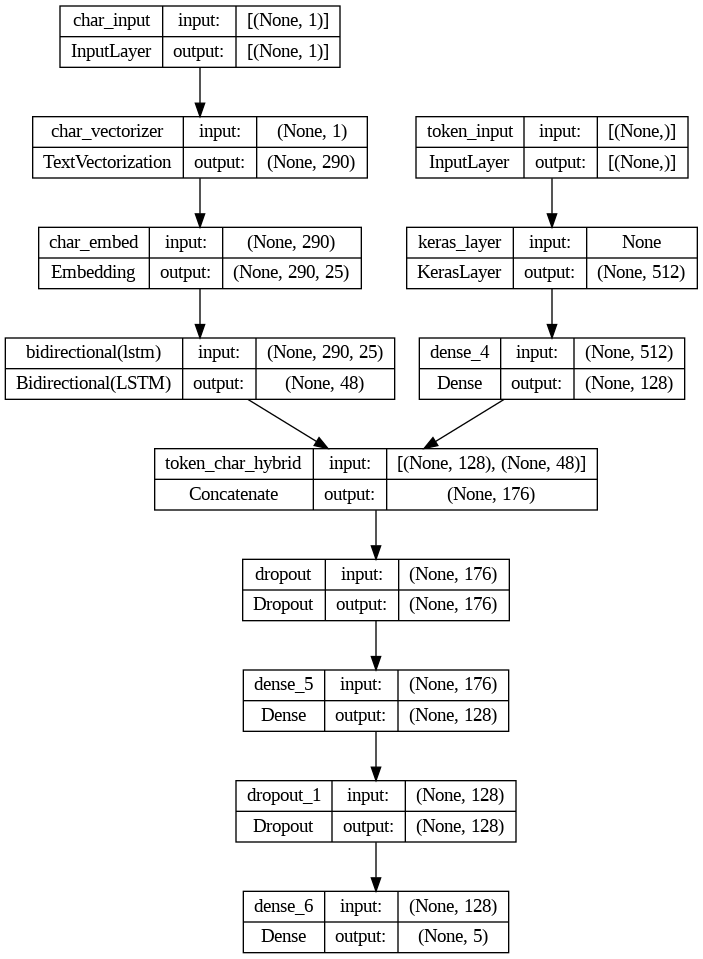

In [80]:
from keras.utils import plot_model
plot_model(model_4, show_shapes=True)

In [81]:
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

### Combining token and character data into a tf.data Dataset

In [82]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 




In [83]:
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

In [84]:
test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_dataset = tf.data.Dataset.zip((test_char_token_data, test_char_token_labels))
test_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

In [85]:
train_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [86]:
model_4.fit(train_char_token_dataset,
            epochs=3,
            steps_per_epoch = int(0.1 * len(train_char_token_dataset)),
            validation_data = val_char_token_dataset,
            validation_steps= int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 41s 54ms/step - loss: 0.9844 - accuracy: 0.6100 - val_loss: 0.7773 - val_accuracy: 0.6965
Epoch 2/3
562/562 [==============================] - 27s 49ms/step - loss: 0.7959 - accuracy: 0.6947 - val_loss: 0.7103 - val_accuracy: 0.7324
Epoch 3/3
562/562 [==============================] - 24s 42ms/step - loss: 0.7723 - accuracy: 0.7033 - val_loss: 0.6806 - val_accuracy: 0.7407


In [87]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 18s 19ms/step - loss: 0.6904 - accuracy: 0.7371


[0.6904257535934448, 0.7371243238449097]

In [88]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 21s 19ms/step


array([[4.3717736e-01, 3.7782884e-01, 4.4651767e-03, 1.7346388e-01,
        7.0647770e-03],
       [2.9970509e-01, 5.5935723e-01, 2.1334274e-03, 1.3732876e-01,
        1.4756063e-03],
       [3.1031358e-01, 1.4981641e-01, 3.8524959e-02, 4.7799197e-01,
        2.3353146e-02],
       ...,
       [5.1953789e-04, 8.6697405e-03, 4.8802663e-02, 1.6110987e-04,
        9.4184697e-01],
       [4.9701771e-03, 4.8007675e-02, 1.8952352e-01, 2.1978326e-03,
        7.5530082e-01],
       [4.2554069e-01, 2.9384044e-01, 1.8179899e-01, 4.1015275e-02,
        5.7804648e-02]], dtype=float32)

In [89]:
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 0])>

In [90]:
model_4_results = calculate_results(val_labels_encoded, model_4_preds)
model_4_results

{'accuracy': 73.71243214616709,
 'precision': 0.7361955376837711,
 'recall': 0.7371243214616708,
 'f1': 0.7345487438145368}

## Model 5: Transfer learning with pretrained token embeddings + character embedding + positional embedding



In [91]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


### Create positional embeddings

In [92]:
# How many different line numbers are there?
train_df['line_number'].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

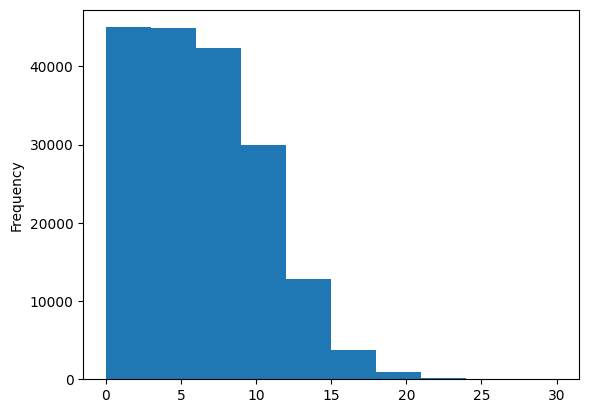

In [93]:
# Check distribution of line_number
train_df['line_number'].plot.hist();

In [94]:
train_line_numbers_one_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df['line_number'].to_numpy(), depth=15)

In [95]:
train_line_numbers_one_hot[:14]

<tf.Tensor: shape=(14, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

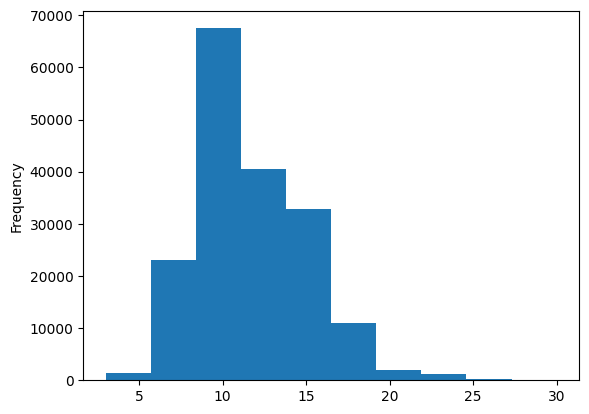

In [96]:
train_df.total_lines.plot.hist();

In [97]:
np.percentile(train_df.total_lines, 98)

20.0

In [98]:
train_total_lines_one_hot = tf.one_hot(train_df['total_lines'].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df['total_lines'].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df['total_lines'].to_numpy(), depth=20)

### Building a tribrid embedding model
1. Create a token-level model
2. Create a character-level model
3. Create a model for the `line_number` feature
4. Create a model for the `total_lines` feature
5. Combine outputs of 1 & 2 using tf.keras.layers.Concatenate
6. Combine outputs of 3, 4 & 5 using tf.keras.layers.Concatenate
7. Create an output layer to accept the tribred embedding and output label probabilites.
8. Combine the inputs of 1,2,3,4 and outputs into a tf.keras.Model

In [99]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype='string', name='token_inputs')
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation='relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_outputs)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype='string', name='char_inputs')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

# 3. Line numbers model
line_number_inputs = layers.Input(shape=(15,), dtype=tf.float32, name='line_number_input')
x = layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, x)

# 4. Total lines model 
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.float32, name='total_lines_input')
y = layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name='char_token_hybrid_embedding')([token_model.output,
                                                                             char_model.output])
z =  layers.Dense(256, activation='relu')(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embedding with combined token and char embeddings
tribrid_embeddings = layers.Concatenate(name='char_token_positional_embedding')([line_number_model.output,
                                                                                 total_lines_model.output,
                                                                                 z])
# 7. Create output layer
output_layer = layers.Dense(5, activation='softmax', name='output_layer')(tribrid_embeddings)

# 8. Put together model with all kinds of inputs
model_5 = tf.keras.Model([line_number_model.input,
                          total_lines_model.input,
                          token_model.input,
                          char_model.input
                          ],output_layer,
                         name='model_5_tribrid_model')

In [100]:
model_5.summary()

Model: "model_5_tribrid_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['token_input

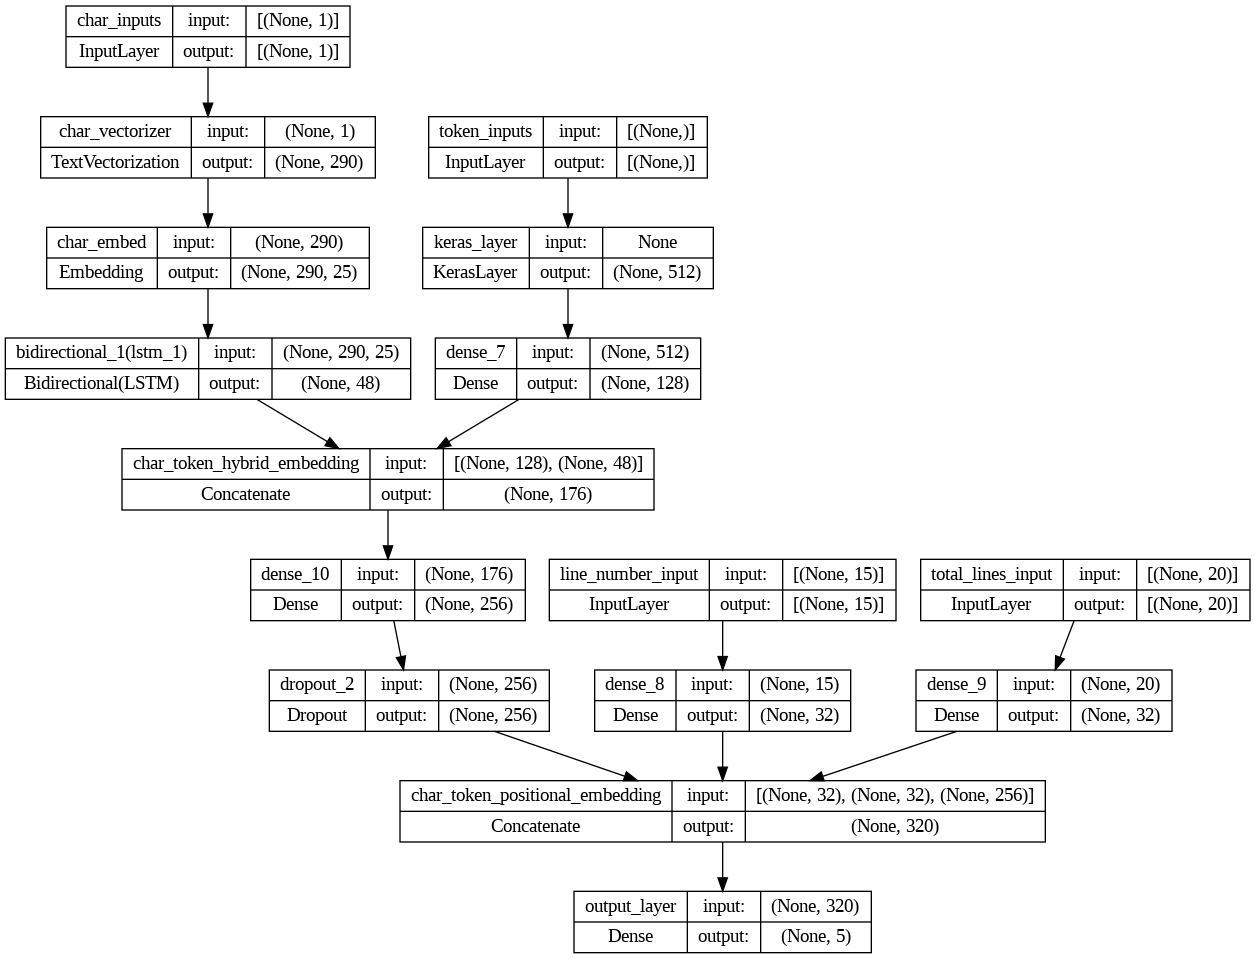

In [101]:
plot_model(model_5, show_shapes=True)

In [103]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # Helps to prevent overfitting
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

### Create tribrid embedding dataset using tf.data

In [105]:
# Create training and validation datasets with all four kinds of data
train_char_token_pos = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                           train_total_lines_one_hot,
                                                           train_sentences,
                                                           train_chars)) 
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos, train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Val data
val_char_token_pos = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                           val_total_lines_one_hot,
                                                           val_sentences,
                                                           val_chars)) 
val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos, val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [106]:
train_char_token_pos_dataset, val_char_token_pos_dataset 

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

## Fitting, evaluating and making predicitons on tribrid model

In [108]:
model_5_history = model_5.fit(train_char_token_pos_dataset,
                              steps_per_epoch = int(0.1 * len(train_char_token_pos_dataset)),
                              epochs=3,
                              validation_data = val_char_token_pos_dataset,
                              validation_steps = int(0.1 * len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 47s 59ms/step - loss: 1.1025 - accuracy: 0.7189 - val_loss: 0.9822 - val_accuracy: 0.8032
Epoch 2/3
562/562 [==============================] - 31s 56ms/step - loss: 0.9665 - accuracy: 0.8174 - val_loss: 0.9502 - val_accuracy: 0.8288
Epoch 3/3
562/562 [==============================] - 25s 45ms/step - loss: 0.9502 - accuracy: 0.8226 - val_loss: 0.9407 - val_accuracy: 0.8314


In [109]:
model_5.evaluate(val_char_token_pos_dataset)

945/945 [==============================] - 21s 22ms/step - loss: 0.9380 - accuracy: 0.8325


[0.9379785656929016, 0.8325169086456299]

In [110]:
model_5_pred_probs = model_5.predict(val_char_token_pos_dataset)
model_5_pred_probs

945/945 [==============================] - 24s 22ms/step


array([[0.5136583 , 0.09224114, 0.01021425, 0.3629223 , 0.02096405],
       [0.52472764, 0.11839637, 0.04019896, 0.30540583, 0.01127122],
       [0.2933555 , 0.10528097, 0.13992976, 0.37980494, 0.08162891],
       ...,
       [0.0377508 , 0.11601252, 0.03740964, 0.0333951 , 0.77543193],
       [0.0286682 , 0.36623466, 0.07056   , 0.02609747, 0.50843966],
       [0.21298169, 0.6008251 , 0.1032446 , 0.03589871, 0.04704994]],
      dtype=float32)

In [111]:
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [112]:
model_5_results = calculate_results(val_labels_encoded, model_5_preds)
model_5_results

{'accuracy': 83.25168807096517,
 'precision': 0.831296726522913,
 'recall': 0.8325168807096518,
 'f1': 0.8316416086971569}

## Compare model results

In [113]:
all_model_results = pd.DataFrame({'model_0_baseline': baseline_results,
                                 'model_1_custom_token_embedding': model_1_results,
                                 'model_2_pretrained_token_embedding': model_2_results,
                                 'model_3_custom_char_embedding': model_3_results,
                                 'model_4_hybrid_char_token_embedding': model_4_results,
                                 'model_5_char_token_pos_embedding': model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custom_token_embedding,78.624388,0.783464,0.786244,0.783882
model_2_pretrained_token_embedding,71.670197,0.717607,0.716702,0.713584
model_3_custom_char_embedding,65.255528,0.654308,0.652555,0.644743
model_4_hybrid_char_token_embedding,73.712432,0.736196,0.737124,0.734549
model_5_char_token_pos_embedding,83.251688,0.831297,0.832517,0.831642


In [114]:
all_model_results['accuracy'] = all_model_results['accuracy']/100 

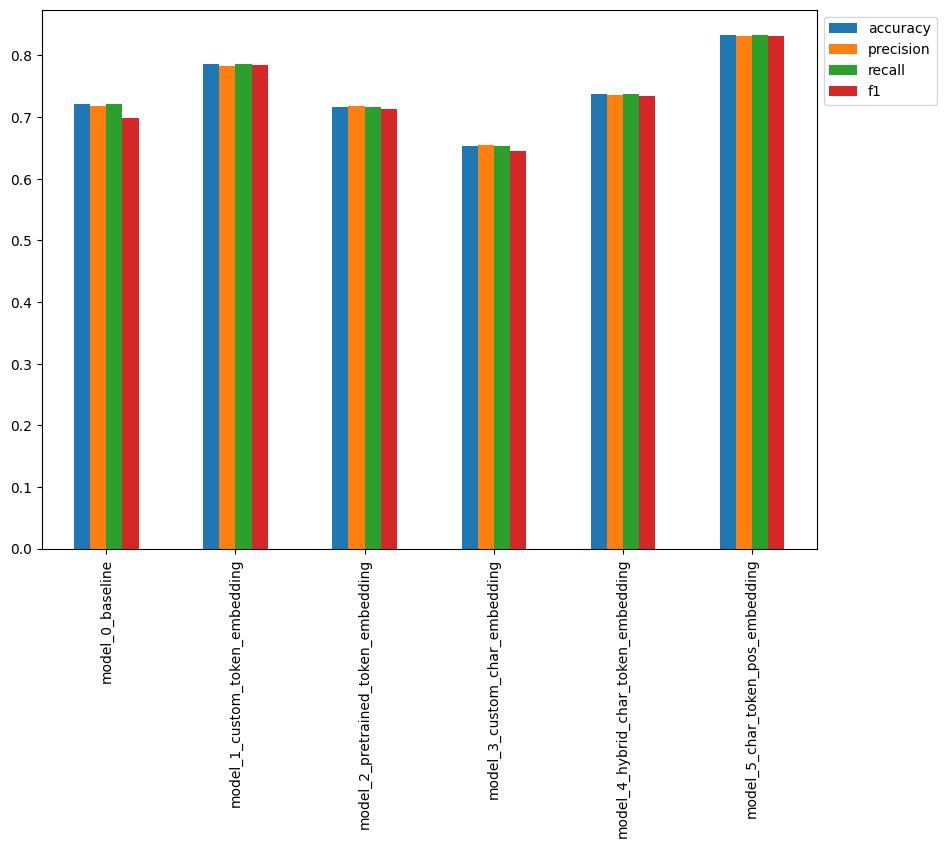

In [115]:
all_model_results.plot(kind='bar', figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

## Saving the model

In [116]:
model_5.save('skimlit_tribrid_model')

In [118]:
loaded_model = tf.keras.models.load_model('skimlit_tribrid_model')